# Variables that most impact the Prosper's alpha rating

## Initial investigation

The first approach with the data set will be to check the variables, possible cleaning and transformation to a smaller data set. The focus will be to investigate the relationships between prosper rating alpha, lines of credit, term of loan and employment status.

## Dataset

The data set contains 113,937 rows and 81 columns, however I sliced into 8 columns, in order to identify relationships between the variables with the target variable which is the `ProsperRating (Alpha)`.

In [7]:
# importing the packages needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# reading the data set
df = pd.read_csv('prosperLoanData.csv')

In [9]:
# slicing the dataset
df_loan = df[['ListingKey', 'Term', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus',
              'IsBorrowerHomeowner', 'CurrentCreditLines', 'LoanOriginalAmount']]

In [10]:
df = pd.read_csv('df_loan_status.csv')

## APR Rate Distribution

Looking further, changing the size of the bins, it is clear that the highest frequency of rates is 0.35, we will see later what can explain this higher rate with bivariate and multivariate graphs.

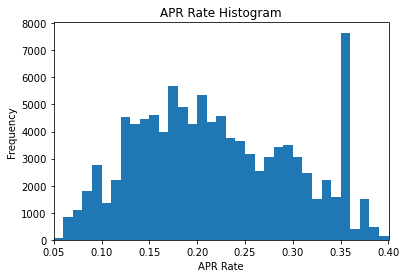

In [11]:
binsize = 0.01 # bins size
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize) # 

# univariate plot of APR rate
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlim([0.05, 0.4])
plt.xlabel('APR Rate')
plt.ylabel('Frequency')
plt.title('APR Rate Histogram')
plt.show()

## Loan Amount Distribution

The logarithmic scale serves as a magnifying glass to go deeper into the data. It is noted that the frequencies change, as well as the loan ranges most required or approved by prosper. There is a much higher frequency close to 25k, 30k. And between 30k and 35k, what we understand is that these are the most approved credit ranges by prosper.

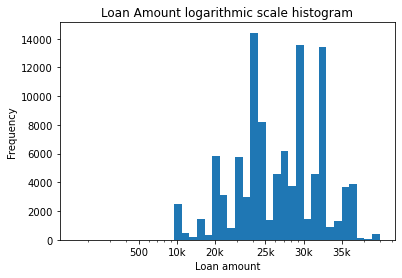

In [12]:
log_binsize = 0.06 # bins size
bins = 10 ** np.arange(2.2, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

# plotting the graph and placing the labels
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log') # inserting the logarithmic scale
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '10k', '20k', '25k', '30k', '35k']); # inserting the logarithmic scale
plt.xlabel('Loan amount')
plt.ylabel('Frequency')
plt.title('Loan Amount logarithmic scale histogram')

plt.show()

In [13]:
# placing the labels in descending order
alpha_order = ['HR','E','D','C','B','A','AA']
ordered_alpha = pd.api.types.CategoricalDtype(ordered = True, categories = alpha_order)

df['ProsperRating_alpha'] = df['ProsperRating_alpha'].astype(ordered_alpha)
# putting the variable in the desired order

df = df.query('ProsperRating_alpha != "Unrated"') # excluding unrated status

## Loan Amount vs APR Rate

In this graph I went deeper to identify the concentration of the data in relation to loan amount and APR rate. Staying between 0.5 and 04, but with a higher concentration in 0.1 and 0.3 APR rate and peak in 0.2. The highest loan amount values within this range are greater than 0 and $ 10k.

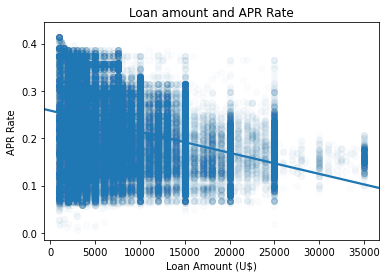

In [14]:
plt.figure(figsize = [6,4]) # adjusting the size of the graphics 
sns.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR',
            truncate=False, x_jitter=0.03, scatter_kws={'alpha':1/50}) # ploting de graph

plt.title('Loan amount and APR Rate') # chart title
plt.xlabel('Loan Amount (U$)') 
plt.ylabel('APR Rate')
plt.show()

## Prosper rating alpha vs Loan Amount vs APR rate

Using multivariate scatter plots, we can see in the concentration of the data that the closer to the HR rating the lower the loan value and the higher the rate. The closer to the AA rating loan values go up, APR rates go down

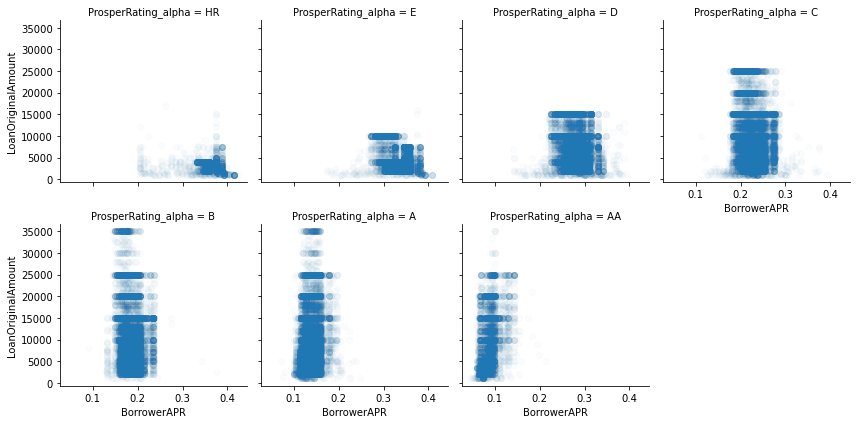

In [15]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df, col = 'ProsperRating_alpha', col_wrap = 4)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha=1/50); # plotting multiple scatterplots

## Rating alpha vs APR rate vs Employment status

The points graph shows that the HR employment status has the highest rates with an average of 0.35 and some variability in part-time and retired. And these points will drop until they reach AA, which is the best rating, with the lowest APR rate on average 0.05 with some variability in not employed.

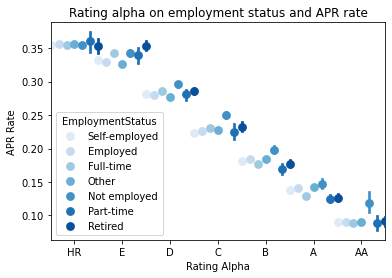

In [16]:
fig = plt.figure(figsize = [6, 4]) # adjusting the size of the graphics
ax = sns.pointplot(data = df, x = 'ProsperRating_alpha', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 1)

plt.title('Rating alpha on employment status and APR rate')
plt.xlabel('Rating Alpha')
plt.ylabel('APR Rate');

## Rating alpha vs APR rate vs Credit lines

In this point graph there is greater variability around the average, when the ratings are closer to AA. However, it is quite clear that having more lines of credit open does not mean that the borrower will have more value available. The rating is the most important for the availability of larger amounts.

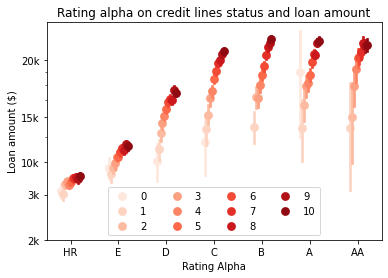

In [17]:
# slicing the dataset with credit lines less than or equal to 10
df_loan_credit_ten = df.query('CurrentCreditLines <= 10') 

fig = plt.figure(figsize = [6, 4]) # adjusting the size of the graphics
ax = sns.pointplot(data = df_loan_credit_ten, x = 'ProsperRating_alpha', y = 'LoanOriginalAmount', hue = 'CurrentCreditLines',
           palette = 'Reds', linestyles = '', dodge = 0.4)

plt.title('Rating alpha on credit lines status and loan amount')
plt.xlabel('Rating Alpha')
plt.ylabel('Loan amount ($)')
plt.yscale('log') # plotting the y-axis on a logarithmic scale
plt.yticks([2e3, 3e3, 4e3, 6e3, 1e4], ['2k', '3k', '10k', '15k', '20k']) # naming the y-axis labels
ax.legend(loc = 0, ncol = 4);

## Rating alpha vs APR rate vs Term

Once again on this dot chart, it is quite clear that the closer to HR the higher the APR rate, and the closer to AA the lower the rate. However, with regard to loan terms, in general, the longer the term, the higher the contracting rate, regardless of the rating.

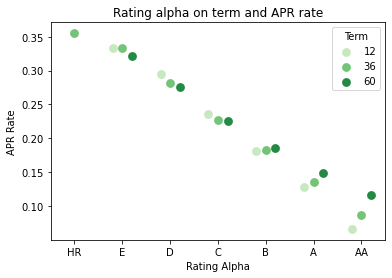

In [18]:
fig = plt.figure(figsize = [6, 4]) # adjusting the size of the graphics
ax = sns.pointplot(data = df, x = 'ProsperRating_alpha', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4)

plt.title('Rating alpha on term and APR rate')
plt.xlabel('Rating Alpha')
plt.ylabel('APR Rate')
plt.show();